<a href="https://colab.research.google.com/github/chandra-sekar-1983/data_visualization/blob/master/Data_Visualization%26Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***1) Import dataset***

***2) Data Understanding***

a) identify dependent and indpendent variable

b) Split features based on datatypes - Numeric ,discrete, categorical  , time variables

c) Understand cardinality of data

***3)Data correctness***

a) Are there any outliers?

b) Do you see missing values?


***4)Ask Questions***

1) What is the general trend of salary?Is it increasing or decreasing or remaining constant?



## ***1) Import Dataset ***


In [181]:
#### salary data is avaialable in 2020 folder

### Importing data
data_file="/content/salary_data.csv"                ### modify here
data=pd.read_csv(data_file)
print(data.shape)
data.head()


(167274, 27)


,Index,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,EXPERIENCE_REQUIRED_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,1,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,BLOOMINGTON,NaN,NaN,NaN,NaN,NaN,15-1132,"Software Developers, Applications",IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,2,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,NaN,IRAN,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132,NaN,greencard,NaN,91440.0,assistant professor,2
2,3,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,4,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,HARLINGEN CISD,NaN,NaN,NaN,NaN,NaN,25-1042,"Biological Science Teachers, Postsecondary",TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,5,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,PORTLAND,NaN,NaN,NaN,NaN,NaN,15-1133,"Software Developers, Systems Software",OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


**** 2) Data Understanding ***

*** 2 a) Set Independent and Dependent variables ***

In [145]:
### Set independent variable and dependent variable
dependent_var="PAID_WAGE_PER_YEAR"                                             ### modify here
independent_var=data.drop(dependent_var,axis=1).columns.to_list()
print(f" The dependent feature is {dependent_var}")
print(f" Number of  Independent features are {len(independent_var)} and  {independent_var}")

 The dependent feature is PAID_WAGE_PER_YEAR
 Number of  Independent features are 26 and  ['Index', 'CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'order']


**2 b) Split numerical ,discrete, categorical and time features***



In [0]:
## Use this code to extract variables  ######## modify here

##[("feature name is -",var,data[var].nunique(), data[var].unique(),print()) for var in independent_var  ]   #### use this code to identify categorical,discrete,numer quickly

In [147]:


## splitting categorical and numerical variable

categorical_var=[var for var in data.columns if data[var].dtypes=='object']
categorical_var=[]
numerical_var=[var for var in data.columns if data[var].dtypes ==('float64' or 'int64')]
time_var=[var for var in data.columns if data[var].dtypes=='datetime64']  


time_var=["CASE_RECEIVED_DATE","DECISION_DATE"]
numerical_var=["CASE_NUMBER","CASE_STATUS","EMPLOYER_NAME","EXPERIENCE_REQUIRED_NUM_MONTHS","Index",
               "PREVAILING_WAGE_SUBMITTED","PAID_WAGE_SUBMITTED","PAID_WAGE_PER_YEAR","order"]

discrete_var=[]

categorical_var=["PREVAILING_WAGE_SUBMITTED_UNIT","PAID_WAGE_SUBMITTED_UNIT","JOB_TITLE","WORK_CITY","EDUCATION_LEVEL_REQUIRED","COLLEGE_MAJOR_REQUIRED",
                 "EXPERIENCE_REQUIRED_Y_N","COUNTRY_OF_CITIZENSHIP","PREVAILING_WAGE_SOC_CODE","PREVAILING_WAGE_SOC_TITLE","WORK_STATE","WORK_POSTAL_CODE",
                 "FULL_TIME_POSITION_Y_N","VISA_CLASS","PREVAILING_WAGE_PER_YEAR","JOB_TITLE_SUBGROUP",]

print("Number of Categorical variables :",len(categorical_var))
print("Categorical variables :",categorical_var)
print()
print("Number of Numerical variables :",len(numerical_var))
print("Numerical variables :",numerical_var)
print()
print("Time variables : ",len(time_var))
print("Time variables :",time_var)

print()
print("Number of Discrete variables :",len(discrete_var))
print("Discrete variables :",discrete_var)


Number of Categorical variables : 16
Categorical variables : ['PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP']

Number of Numerical variables : 9
Numerical variables : ['CASE_NUMBER', 'CASE_STATUS', 'EMPLOYER_NAME', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'Index', 'PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_PER_YEAR', 'order']

Time variables :  2
Time variables : ['CASE_RECEIVED_DATE', 'DECISION_DATE']

Number of Discrete variables : 0
Discrete variables : []


In [148]:
### verifiying if there are any columns appearing in both split

print("Checking if there are duplicate columns or not")

### verifiying if there are any columns appearing in both split

print([var for var in numerical_var if var in (categorical_var or discrete_var or time_var) ])
print([var for var in discrete_var if var in (categorical_var or numerical_var or time_var) ])
print([var for var in categorical_var if var in ( discrete_var or numerical_var or time_var) ])
print([var for var in time_var if var in ( discrete_var or numerical_var or catgorical_var) ])

Checking if there are duplicate columns or not
[]
[]
[]
[]


*** 2 C) Data cardinality - Understanding subcategories categorical data is taking***

In [149]:
[(var,data[var].nunique()) for var in ( categorical_var or discret_var) ]

[('PREVAILING_WAGE_SUBMITTED_UNIT', 5),
 ('PAID_WAGE_SUBMITTED_UNIT', 5),
 ('JOB_TITLE', 12589),
 ('WORK_CITY', 4888),
 ('EDUCATION_LEVEL_REQUIRED', 7),
 ('COLLEGE_MAJOR_REQUIRED', 3261),
 ('EXPERIENCE_REQUIRED_Y_N', 2),
 ('COUNTRY_OF_CITIZENSHIP', 134),
 ('PREVAILING_WAGE_SOC_CODE', 402),
 ('PREVAILING_WAGE_SOC_TITLE', 561),
 ('WORK_STATE', 110),
 ('WORK_POSTAL_CODE', 4866),
 ('FULL_TIME_POSITION_Y_N', 2),
 ('VISA_CLASS', 5),
 ('PREVAILING_WAGE_PER_YEAR', 15315),
 ('JOB_TITLE_SUBGROUP', 8)]

***3) Data Correctness***

***3 a) Identify Missing Values ***

Missing values : True

Number of rows that contain missing element  911840
Percentage of Dataset that contains missing element is 5.45 %

The missing value columns are 
[('WORK_CITY', 3), ('EDUCATION_LEVEL_REQUIRED', 156181), ('COLLEGE_MAJOR_REQUIRED', 156223), ('EXPERIENCE_REQUIRED_Y_N', 156181), ('EXPERIENCE_REQUIRED_NUM_MONTHS', 162309), ('COUNTRY_OF_CITIZENSHIP', 156181), ('WORK_POSTAL_CODE', 113601), ('FULL_TIME_POSITION_Y_N', 11093), ('PREVAILING_WAGE_PER_YEAR', 68)]


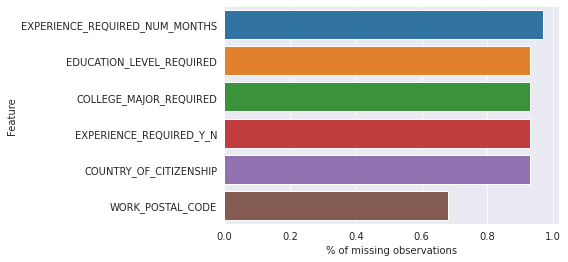

In [150]:
### Finding if the data set contains missing elements are not.True indicates presence of missing elements

print("Missing values :",data.isnull().values.any())

print()
### Finding total number of rows that contains missing elements
print("Number of rows that contain missing element ",data.isnull().sum().sum())
print(f"Percentage of Dataset that contains missing element is {round(data.isnull().sum().sum()/len(data),2)} %")

print()
# make a list of the variables that contain missing values
missing_val_columns=[(col,data[col].isnull().sum()) for col in data.columns if data[col].isnull().sum()>0]
print("The missing value columns are ")
print(missing_val_columns)

### Calculating Percentage of missing observation with respect to full dataset

missing_val_columns=pd.DataFrame(missing_val_columns)
missing_val_columns[1]=round(missing_val_columns[1]/len(data),2)

missing_val_columns=missing_val_columns.rename(columns={0:"Feature",1:"% of missing observations"}).reset_index()
missing_val_columns=missing_val_columns[missing_val_columns["% of missing observations"]>0.1]
missing_val_columns=missing_val_columns.sort_values(by='% of missing observations', ascending=False)



### Visualizing the distribution of missing features

ax = sns.barplot(x="% of missing observations",y="Feature", data=missing_val_columns,orient = 'h')


Insight for Missing Values :Our dataset contains a few variables with missing values. We need to account for this in our Feature engineering /preprocessing step.

*** 3 b)Outliers -  Extreme values may affect the performance of a linear model. Let's find out if we have any in our variables***

Median value : 78600.0


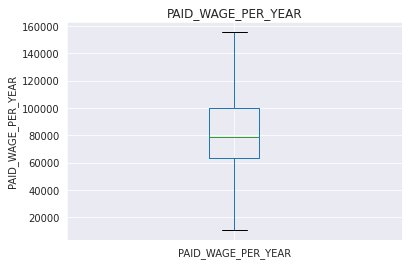

Median value : 78600.0


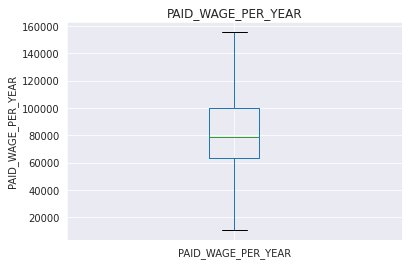

In [183]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    
    df.boxplot(column=var)
    
    print("Median value :",df[var].median())
    plt.title(var)
    plt.ylabel(var)
    plt.show()



## function to treat outliers:
def outlier_treatment(df,col):
     sorted(df[col])
     Q1,Q3 = np.percentile(df[col] , [25,75])
     IQR = Q3 - Q1
     lower_range = Q1 - (1.5 * IQR)
     upper_range = Q3 + (1.5 * IQR)
     quantile_10_value=df[col].quantile(0.10)
     quantile_90_value=df[col].quantile(0.90)
     df[col] = np.where(df[col] < lower_range, quantile_10_value,df[col])
     df[col] = np.where(df[col] >upper_range,quantile_90_value,df[col])

find_outliers(data,"PAID_WAGE_PER_YEAR")
outlier_treatment(data,"PAID_WAGE_PER_YEAR")
find_outliers(data,"PAID_WAGE_PER_YEAR")

**Function to extract Year,Month,Date from  Independent Features**

In [0]:
### function extracts year and month
import datetime

def get_year_month_date(data,col):
  data[col] = pd.to_datetime(data[col] ) 
  data[col+"_Yr"]=data[col].dt.year
  data[col+"_Month"]=data[col].dt.month
  data[col+"_Day"]=data[col].dt.day
  data[col+"_Quarter"]=data["CASE_RECEIVED_DATE"].dt.quarter

get_year_month_date(data,"CASE_RECEIVED_DATE")
get_year_month_date(data,"DECISION_DATE")

***4 1) General Trend of salary ***

In [213]:
data('DECISION_DATE_Month')['PAID_WAGE_PER_YEAR'].median()

TypeError: ignored

In [217]:
data[['DECISION_DATE_Month', 'PAID_WAGE_PER_YEAR']].groupby(['DECISION_DATE_Month', 'PAID_WAGE_PER_YEAR']).mean()

DataError: ignored

**Functions**************************

In [0]:
sns.set_style("darkgrid")

### line plot to get trend - trend analysis

### 1) Date is represented as individual date.This need aggregation.
## include datecolumn also in the feature_name
def get_line_plot(dataframe,feature_name,date_col):
  ### Date on X-axis / continous var on Y-axis
  data["year"]=dataframe[feature]
  data=d
  

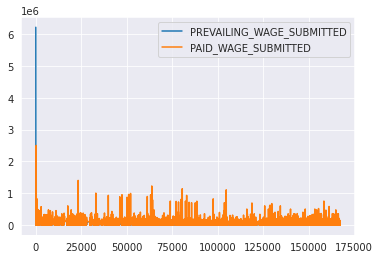

In [0]:
get_line_plot(data,["PREVAILING_WAGE_SUBMITTED","PAID_WAGE_SUBMITTED"])

In [0]:
data.columns

Index(['Index', 'CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE',
       'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE',
       'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR',
       'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'order'],
      dtype='object')

**end of functions**

In [0]:
### Functions for plotting and visualization

### This plots bar chart with proportions
def get_bar_plot(dataframe,feature_name):
  
   df=pd.DataFrame(dataframe[feature_name])
   df["Proportion (%)"]=1
   df=df.groupby([feature_name]).agg({"Proportion (%)":"count"}).reset_index()
   df["Proportion (%)"]=df["Proportion (%)"]/df["Proportion (%)"].sum()*100
   sns.barplot(x="Proportion (%)", y=feature_name,data=df)
   title_name="Distribution of " + feature_name 
   plt.title(title_name)
   plt.show()



###############################################################################################################
#### Draw bar and box plot - with Quartiles

from numpy import median
def get_bar_facet_plot(data,var,output_var,chart_type=plt.hist,hue=None,col=None):
  df=pd.DataFrame(data[var])
  df["Proportion (%)"]=1
  df=df.groupby([var]).agg({"Proportion (%)":"count"}).reset_index()
  df["Proportion (%)"]=df["Proportion (%)"]/df["Proportion (%)"].sum()*100
  sns.barplot(x="Proportion (%)", y=var,data=df)
  title_name="Proportion of " + var 
  plt.title(title_name)
  plt.show()

### code to calculate median value
  
  print("Distribution of",output_var ,"based on ",var)
  
  plt.figure(figsize=(16, 16))
  #g = sns.catplot(x=output_var, y=var,
   #             hue=hue, col=col,
    #            data=data, kind="bar",
     #           height=4, aspect=.7);
  
  sns.barplot(x=output_var, y=var, data=data, estimator=median,hue=hue)
  plt.show()

### code to plot based on output value
  plt.figure(figsize=(16, 16))
  g = sns.FacetGrid(data, col=var,palette='Set1')
  g.map(chart_type, output_var,color="r");
  #title_name1="Distribution of Median" +output_variable+ var 
  #plt.title(title_name1)
  print("Distribution of",output_var ,"based on ",var)
  plt.show()   


In [0]:
#### salary data is avaialable in 2020 folder

In [0]:
### Importing data
data=pd.read_csv("/content/salary_data.csv")

In [0]:
data.head()

,Index,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,EXPERIENCE_REQUIRED_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,1,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,BLOOMINGTON,NaN,NaN,NaN,NaN,NaN,15-1132,"Software Developers, Applications",IL,NaN,y,H-1B,NaN,62171.0,software engineer,1.0
1,2,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,NaN,IRAN,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132,NaN,greencard,NaN,91440.0,assistant professor,2.0
2,3,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,NaN,49470.0,teacher,3.0
3,4,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,HARLINGEN CISD,NaN,NaN,NaN,NaN,NaN,25-1042,"Biological Science Teachers, Postsecondary",TX,NaN,y,H-1B,NaN,43800.0,teacher,4.0
4,5,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,PORTLAND,NaN,NaN,NaN,NaN,NaN,15-1133,"Software Developers, Systems Software",OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5.0


In [0]:
data.shape

(167275, 27)

In [0]:
### setting independent variable and dependent variable
dependent_var="PAID_WAGE_PER_YEAR"
independent_var=data.drop(dependent_var,axis=1).columns.to_list()
print((dependent_var))
print(independent_var)



PAID_WAGE_PER_YEAR
['Index', 'CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'order']


In [0]:
### Splitting numerical ,discreate and categorical 

## splitting categorical and numerical variable
categorical_var=[var for var in data.columns if data[var].dtypes=='object']
numerical_var=[var for var in data.columns if data[var].dtypes ==('float64' or 'int64')]
discrete_var=[]
print("Categorical variables are",categorical_var)
print("numerical variables are",numerical_var)
print("discrete variables are",discrete_var)





Categorical variables are ['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'JOB_TITLE_SUBGROUP']
numerical variables are ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR']
discrete variables are []


In [0]:
### verifiying if there are any columns appearing in both split

print("Checking if there are duplicate columns or not")
print([var for var in numerical_var if var in (categorical_var or discrete_var) ])
print([var for var in discrete_var if var in (categorical_var or numerical_var) ])
print([var for var in categorical_var if var in ( discrete_var or numerical_var) ])

Checking if there are duplicate columns or not
[]
[]
[]


***1)Plan Analysis***

****2) Ask Questions***

***1) Do specific sub-types of data-related jobs have higher or lower salaries than others?***


***2)Do salaries change based on visa type (very important to know if you are not a US citizen)?***

***1) Do specific sub-types of data-related jobs have higher or lower salaries than others?***

In [0]:
var="JOB_TITLE_SUBGROUP"
output_variable=dependent_var
get_bar_facet_plot(data,var,output_variable)

NameError: ignored

***2)Do salaries change based on visa type (very important to know if you are not a US citizen)?***

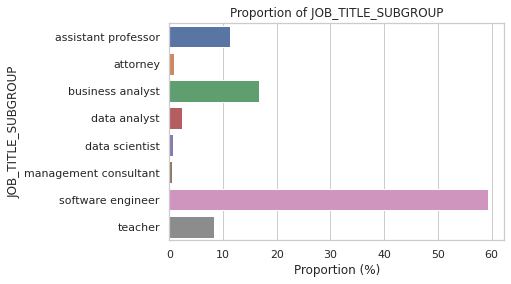

Distribution of PAID_WAGE_PER_YEAR based on  JOB_TITLE_SUBGROUP


ValueError: ignored

<Figure size 1152x1152 with 0 Axes>

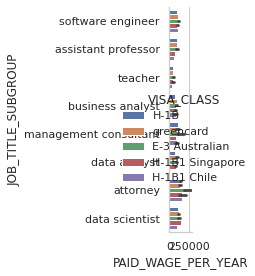

In [0]:
var="JOB_TITLE_SUBGROUP"
output_variable=dependent_var
get_bar_facet_plot(data,var,output_variable,hue="VISA_CLASS")

<Figure size 1152x1152 with 0 Axes>

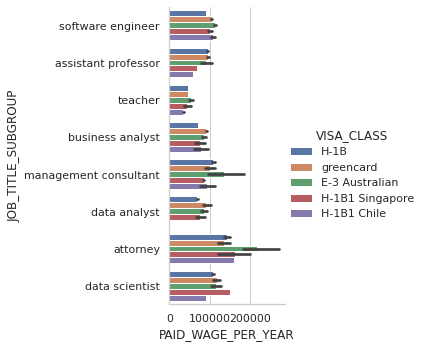

In [0]:
plt.figure(figsize=(16, 16))
sns.set(style="whitegrid")
g = sns.catplot(x=dependent_var, y="JOB_TITLE_SUBGROUP",
                hue="VISA_CLASS",
                data=data, kind="bar")
                